In [1]:
# yolo: you look only once
# ssd: single short detection
# here we are using yolo3: darknet
# currently we have yolo10 version
# Here i will explain from very scratch
# but yolo10 has package available now: ultraalytics
# cfg: configuration file
#      It has model architecture
#      how many layers
#      how many convolution
#      batch size/learning rate/optimizer

# It is Transfer learning, we are not developing the model from scratch

# weight file.
#   after develop the model we have weight file

# coco: is a dataset name on which the model devloped.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
modelConf="yolov3-tiny.cfg"
modelWeights="yolov3-tiny.weights"
net=cv2.dnn.readNetFromDarknet(modelConf,modelWeights)
net

< cv2.dnn.Net 00000280CC98E8F0>

In [4]:
dir(net)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'addLayer',
 'addLayerToPrev',
 'connect',
 'dump',
 'dumpToFile',
 'dumpToPbtxt',
 'empty',
 'enableFusion',
 'enableWinograd',
 'forward',
 'forwardAndRetrieve',
 'forwardAsync',
 'getFLOPS',
 'getInputDetails',
 'getLayer',
 'getLayerId',
 'getLayerNames',
 'getLayerTypes',
 'getLayersCount',
 'getLayersShapes',
 'getMemoryConsumption',
 'getOutputDetails',
 'getParam',
 'getPerfProfile',
 'getUnconnectedOutLayers',
 'getUnconnectedOutLayersNames',
 'quantize',
 'readFromModelOptimizer',
 'setHalideScheduler',
 'setInput',
 'setInputShape',
 'setInputsNames',
 'setParam',
 'setPreferableBackend',
 'setPreferableTarget']

In [5]:
classesFile='coco.names'
with open(classesFile,'rt') as f:
    classes=f.read().rstrip('\n').split('\n')
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [6]:
len(classes)

80

In [7]:
l=net.getLayerNames()
len(l)

48

In [8]:
l

('conv_0',
 'bn_0',
 'leaky_1',
 'pool_1',
 'conv_2',
 'bn_2',
 'leaky_3',
 'pool_3',
 'conv_4',
 'bn_4',
 'leaky_5',
 'pool_5',
 'conv_6',
 'bn_6',
 'leaky_7',
 'pool_7',
 'conv_8',
 'bn_8',
 'leaky_9',
 'pool_9',
 'conv_10',
 'bn_10',
 'leaky_11',
 'pool_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'conv_15',
 'permute_16',
 'yolo_16',
 'identity_17',
 'conv_18',
 'bn_18',
 'leaky_19',
 'upsample_19',
 'concat_20',
 'conv_21',
 'bn_21',
 'leaky_22',
 'conv_22',
 'permute_23',
 'yolo_23')

In [9]:
l1=net.getUnconnectedOutLayers()
l1

array([36, 48])

In [10]:
l[35],l[47] # python index start from 0

('yolo_16', 'yolo_23')

In [11]:
net

< cv2.dnn.Net 00000280CC98E8F0>

In [12]:
net.getFLOPS

<function Net.getFLOPS>

In [13]:
net.getInputDetails

<function Net.getInputDetails>

In [14]:
net.getLayer('leaky_1')

< cv2.dnn.Layer 00000280DB1ABC90>

In [15]:
net.getLayerId('leaky_1')

3

In [16]:
net.getLayerNames()

('conv_0',
 'bn_0',
 'leaky_1',
 'pool_1',
 'conv_2',
 'bn_2',
 'leaky_3',
 'pool_3',
 'conv_4',
 'bn_4',
 'leaky_5',
 'pool_5',
 'conv_6',
 'bn_6',
 'leaky_7',
 'pool_7',
 'conv_8',
 'bn_8',
 'leaky_9',
 'pool_9',
 'conv_10',
 'bn_10',
 'leaky_11',
 'pool_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'conv_15',
 'permute_16',
 'yolo_16',
 'identity_17',
 'conv_18',
 'bn_18',
 'leaky_19',
 'upsample_19',
 'concat_20',
 'conv_21',
 'bn_21',
 'leaky_22',
 'conv_22',
 'permute_23',
 'yolo_23')

In [17]:
net.getLayerTypes()

('BatchNorm',
 'Concat',
 'Convolution',
 'Identity',
 'Permute',
 'Pooling',
 'ReLU',
 'Region',
 'Resize',
 '__NetInputLayer__')

In [18]:
net.getLayersCount('Identity')

1

In [19]:
net.getLayersShapes()

error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'getLayersShapes'
> Overload resolution failed:
>  - dnn_Net.getLayersShapes() missing required argument 'netInputShapes' (pos 1)
>  - dnn_Net.getLayersShapes() missing required argument 'netInputShape' (pos 1)


In [22]:
net.getMemoryConsumption

<function Net.getMemoryConsumption>

In [23]:
net.getOutputDetails

<function Net.getOutputDetails>

In [24]:
net.getParam('yolo_16')

array([[ 81.,  82., 135., 169., 344., 319.]], dtype=float32)

In [25]:
net.getPerfProfile

<function Net.getPerfProfile>

In [26]:
net.getUnconnectedOutLayers()

array([36, 48])

In [27]:
net.getUnconnectedOutLayersNames()

('yolo_16', 'yolo_23')

### blobfromImage() function

It returns a 4-dimensional array/blob for the input image. 
You can additionally use it to preprocess your image to match your input requirements. 
You can use its different parameters to transform your image, 

so let’s discuss all its parameters: 
    
**image**

- This is the image that we want to preprocess (for our model)
    
**scalefactor**

- scale factor basically multiplies(scales) our image channels. And remember that it scales it down by a factor of 1/n, where n is the scalefactor you provided.

**size**

- this is the target size that we want our image to become. Most common CNNs use 224×224 or 229×229 pixels as their input image array, but you can set it to meet your model requirements.

**mean**

- this is the mean subtracting values. You can input a single value or a 3-item tuple for each channel RGB, it will basically subtract the mean value from all the channels accordingly, this is done to normalize our pixel values. Note: mean argument utilizes the RGB sequence

**swapRB**

   - OpenCV by default reads an image in BGR format, but as I mentioned above that the mean argument takes in the values in RGB sequence, so to prevent any disruption this function, as the name implies swaps the red and blue channels. ( i.e why its default value is True)

In [28]:
# reshape the image
inpWidth = 416
inpHeight = 416
frame=cv2.imread(r"C:\Data Sets\5.30 AM batch\files\images\dog.jpg")
# generally image will take as BGR we need to change RGB
blob = cv2.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop = False) # pass the image

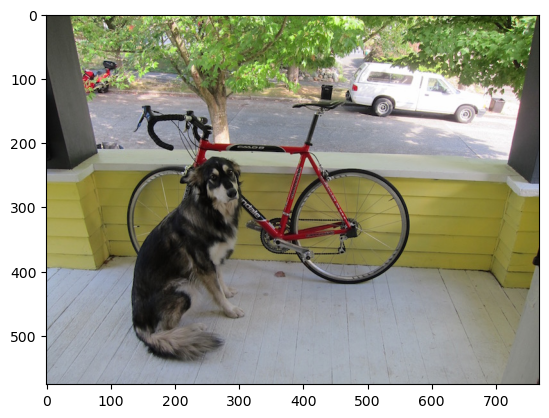

In [29]:
# Change BGR to RGB
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
plt.imshow(img)

In [30]:
frame.shape

(576, 768, 3)

In [31]:
blob.shape

(1, 3, 416, 416)

In [32]:
blob[0].shape


(3, 416, 416)

In [41]:
im

array([[[0.22352943, 0.23529413, 0.2392157 ],
        [0.227451  , 0.21960786, 0.227451  ],
        [0.227451  , 0.22352943, 0.22352943],
        ...,
        [0.49411768, 0.6117647 , 0.62352943],
        [0.6666667 , 0.6431373 , 0.7411765 ],
        [0.79215693, 0.3803922 , 0.227451  ]],

       [[0.23137257, 0.23137257, 0.2392157 ],
        [0.24313727, 0.23137257, 0.23137257],
        [0.2392157 , 0.23137257, 0.227451  ],
        ...,
        [0.8078432 , 0.74509805, 0.67058825],
        [0.49803925, 0.34117648, 0.5411765 ],
        [0.7019608 , 0.28627452, 0.23529413]],

       [[0.23137257, 0.2392157 , 0.24313727],
        [0.24705884, 0.24705884, 0.23529413],
        [0.23137257, 0.23529413, 0.2392157 ],
        ...,
        [0.6       , 0.47450984, 0.4431373 ],
        [0.3921569 , 0.3137255 , 0.30588236],
        [0.2784314 , 0.21568629, 0.19215688]],

       ...,

       [[0.6901961 , 0.7019608 , 0.7058824 ],
        [0.7137255 , 0.7137255 , 0.69803923],
        [0.68235296, 0

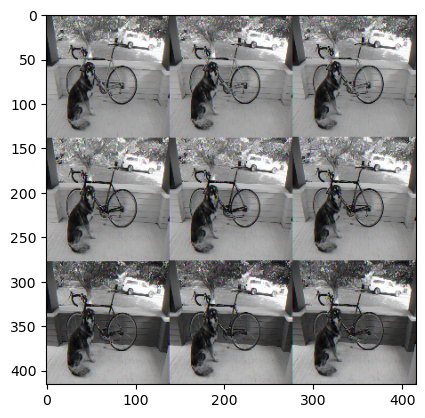

In [33]:
im=blob[0].reshape(416,416,3)
plt.imshow(im)

In [34]:
net.setInput(blob)

In [35]:
yolo_layers=net.getUnconnectedOutLayersNames()
outs = net.forward(yolo_layers)
outs
# there two yolo layers are there
# in image two objects are there
# we have toatal 80 classes are there
# we got 85 values 5+80
# 5 means  x,y,w,h,confidance
# 80 mean probability of each class

(array([[0.04629856, 0.04855685, 0.20454988, ..., 0.        , 0.        ,
         0.        ],
        [0.03691919, 0.05203305, 0.14872797, ..., 0.        , 0.        ,
         0.        ],
        [0.03360242, 0.0461693 , 0.76369286, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.95248353, 0.963941  , 0.1911617 , ..., 0.        , 0.        ,
         0.        ],
        [0.9570926 , 0.95338863, 0.1868322 , ..., 0.        , 0.        ,
         0.        ],
        [0.9686857 , 0.9525847 , 0.7930905 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.01915744, 0.01699508, 0.03062352, ..., 0.        , 0.        ,
         0.        ],
        [0.02472977, 0.02360389, 0.04224724, ..., 0.        , 0.        ,
         0.        ],
        [0.01501428, 0.0198308 , 0.11940214, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97540367, 0.9773502 , 0.02305205, ..., 0.        , 0.        ,
         0.        

In [36]:
len(outs) # two objects output

2

In [37]:
len(outs[0]) # model is identifies total 507 boxes and predictins

#5+80 
# first 5 values are the  x,y,w,h and confidence for the first box
# remaining 80 are the classes

507

In [42]:
len(outs[1])

2028

In [38]:
len(outs[0][0])  # 85 values

85

In [39]:
list(outs[0][0])[:5]

[0.04629856, 0.048556846, 0.20454988, 0.17124683, 5.54704e-06]

In [40]:
list(outs[0][0])[5:]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [48]:
frameHeight = frame.shape[0]
frameWidth = frame.shape[1]
boxes=[]
confidences=[]
classIDs=[]
for out in outs: # calling each object boxes
    for detection in out: # calling each box
        score=detection[5:] # probability of 80 classes
        class_id=np.argmax(score) # max probability id
        confidence=score[class_id] # getting the confidance
        if confidence>0.7:         # if confidance >70% consider as that is valid bounding box
            print(detection)
            centerX = int(detection[0] * frameWidth)  # before we pass the object we divided with frame width
            # these are the normalized values so multiply again
            centerY = int(detection[1] * frameHeight)
            width = int(detection[2]* frameWidth)
            height = int(detection[3]*frameHeight )
            left = int(centerX - width/2)
            top = int(centerY - height/2)

            classIDs.append(class_id)
            confidences.append(float(confidence))
            boxes.append([left, top, width, height])
            
boxes

[0.7506749  0.22071587 0.28650168 0.15503979 0.95903397 0.
 0.         0.72524565 0.         0.         0.         0.
 0.39470446 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.3298957  0.64003456 0.33577326 0.520143   0.8333812  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

[[466, 82, 220, 89], [124, 218, 257, 299]]

NMX=non max septation

In [50]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
indexes  # surprass many boxes

array([1, 0])

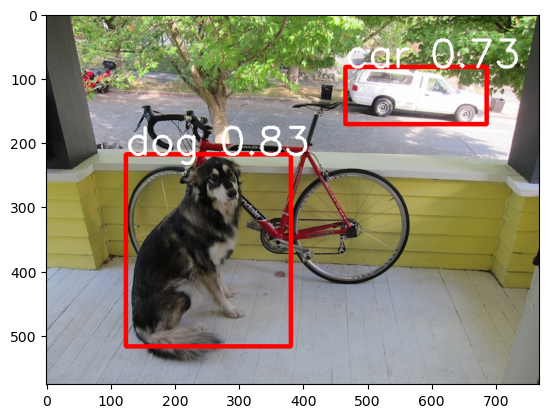

In [51]:
font=cv2.FONT_HERSHEY_SIMPLEX
color=(255,0,0) # RGB
for i in indexes:
    x,y,w,h=boxes[i]
    label=str(classes[classIDs[i]])
    confi=str(round(confidences[i],2))
    #color=colors[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),color,5,i)   # (x,y): left,top     (x+w,y+h): right,bottom
    cv2.putText(img,label +" "+confi,(x,y),font,2,(255,255,255),3)
plt.imshow(img)